In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Company Stock and Investment.csv')

In [3]:
df

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793


In [4]:
df.drop('Gold Investments', axis=1, inplace=True)

In [5]:
df

,Date,Oil Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.017354,0.006848
1,04-01-2010,0.026830,0.015565,-0.004609
2,05-01-2010,0.002699,0.001729,0.005900
3,06-01-2010,0.021688,-0.015906,-0.018116
4,07-01-2010,-0.006256,-0.001849,-0.017013
...,...,...,...,...
1979,09-11-2017,0.005984,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.015118,0.006793


In [6]:
df.drop('Comp Stock',axis=1,inplace=True)

In [7]:
df.drop('Other sharesInvestments',axis=1,inplace=True)

In [8]:
df

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256
...,...,...
1979,09-11-2017,0.005984
1980,10-11-2017,-0.007173
1981,13-11-2017,0.000352
1982,14-11-2017,-0.019376


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
Date               1984 non-null object
Oil Investments    1984 non-null float64
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df

,Date,Oil Investments
0,2009-12-31,0.025417
1,2010-04-01,0.026830
2,2010-05-01,0.002699
3,2010-06-01,0.021688
4,2010-07-01,-0.006256
...,...,...
1979,2017-09-11,0.005984
1980,2017-10-11,-0.007173
1981,2017-11-13,0.000352
1982,2017-11-14,-0.019376


In [12]:
start_date = '2009-12-31'
end_date = '2010-12-31'

In [13]:
after_start_date = df['Date'] >= start_date
before_end_date = df['Date'] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df.loc[between_two_dates]

print(filtered_dates)

          Date  Oil Investments
0   2009-12-31         0.025417
1   2010-04-01         0.026830
2   2010-05-01         0.002699
3   2010-06-01         0.021688
4   2010-07-01        -0.006256
..         ...              ...
248 2010-12-27         0.001651
249 2010-12-28         0.005385
250 2010-12-29        -0.003826
251 2010-12-30        -0.014046
252 2010-12-31         0.017028

[253 rows x 2 columns]


In [14]:
filtered_dates.head()

,Date,Oil Investments
0,2009-12-31,0.025417
1,2010-04-01,0.026830
2,2010-05-01,0.002699
3,2010-06-01,0.021688
4,2010-07-01,-0.006256


In [15]:
filtered_dates.set_index('Date',inplace=True)

In [16]:
filtered_dates.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256


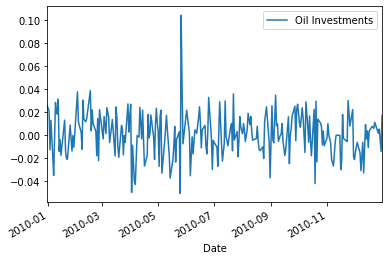

In [17]:
filtered_dates.plot()

In [18]:
start_date2 = '2011-01-01'
end_date2 = '2011-12-31'

In [19]:
after_start_date = df['Date'] >= start_date2
before_end_date = df['Date'] <= end_date2
between_two_dates = after_start_date & before_end_date
filtered_dates2 = df.loc[between_two_dates]

print(filtered_dates2)

          Date  Oil Investments
253 2011-03-01         0.002298
254 2011-04-01        -0.024020
255 2011-05-01         0.010180
256 2011-06-01        -0.021373
257 2011-07-01        -0.003395
..         ...              ...
500 2011-12-23         0.003018
501 2011-12-27         0.015744
502 2011-12-28        -0.018264
503 2011-12-29         0.002414
504 2011-12-30        -0.008527

[252 rows x 2 columns]


In [20]:
filtered_dates2.set_index('Date',inplace=True)

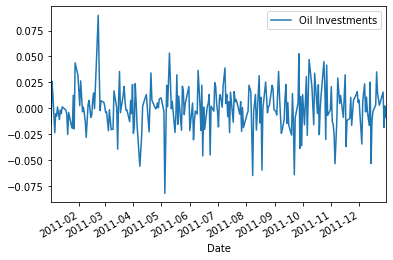

In [21]:
filtered_dates2.plot()

In [22]:
start_date3 = '2012-01-01'
end_date3 = '2012-12-31'

In [23]:
after_start_date = df['Date'] >= start_date3
before_end_date = df['Date'] <= end_date3
between_two_dates = after_start_date & before_end_date
filtered_dates3 = df.loc[between_two_dates]

print(filtered_dates3)

          Date  Oil Investments
505 2012-03-01         0.041789
506 2012-04-01         0.002525
507 2012-05-01        -0.013660
508 2012-06-01        -0.002456
509 2012-09-01        -0.002462
..         ...              ...
750 2012-12-24         0.001020
751 2012-12-26         0.027410
752 2012-12-27         0.002205
753 2012-12-28        -0.002750
754 2012-12-31         0.012905

[250 rows x 2 columns]


In [24]:
filtered_dates3.set_index('Date',inplace=True)

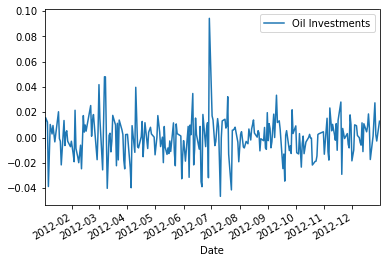

In [25]:
filtered_dates3.plot()

In [26]:
start_date4 = '2013-01-01'
end_date4 = '2013-12-31'

In [27]:
after_start_date = df['Date'] >= start_date4
before_end_date = df['Date'] <= end_date4
between_two_dates = after_start_date & before_end_date
filtered_dates4 = df.loc[between_two_dates]

print(filtered_dates4)

           Date  Oil Investments
755  2013-02-01         0.014265
756  2013-03-01        -0.001825
757  2013-04-01         0.001613
758  2013-07-01         0.000859
759  2013-08-01         0.000107
...         ...              ...
1002 2013-12-24         0.002535
1003 2013-12-26         0.003135
1004 2013-12-27         0.007663
1005 2013-12-30        -0.010406
1006 2013-12-31        -0.007381

[252 rows x 2 columns]


In [28]:
filtered_dates4.set_index('Date',inplace=True)

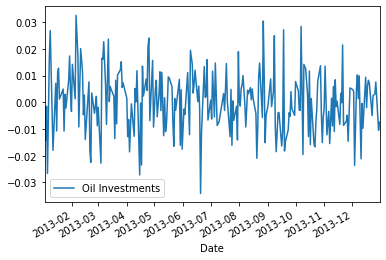

In [29]:
filtered_dates4.plot()

In [30]:
start_date5 = '2014-01-01'
end_date5 = '2014-12-31'

In [31]:
after_start_date = df['Date'] >= start_date5
before_end_date = df['Date'] <= end_date5
between_two_dates = after_start_date & before_end_date
filtered_dates5 = df.loc[between_two_dates]

print(filtered_dates5)

           Date  Oil Investments
1007 2014-02-01        -0.030865
1008 2014-03-01        -0.015556
1009 2014-06-01        -0.005766
1010 2014-07-01         0.002040
1011 2014-08-01        -0.015111
...         ...              ...
1254 2014-12-24        -0.019021
1255 2014-12-26        -0.019928
1256 2014-12-29        -0.020700
1257 2014-12-30         0.012720
1258 2014-12-31        -0.012745

[252 rows x 2 columns]


In [32]:
filtered_dates5.set_index('Date',inplace=True)

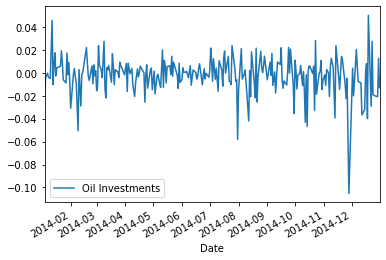

In [33]:
filtered_dates5.plot()

In [34]:
start_date6 = '2015-01-01'
end_date6 = '2015-12-31'

In [35]:
after_start_date = df['Date'] >= start_date6
before_end_date = df['Date'] <= end_date6
between_two_dates = after_start_date & before_end_date
filtered_dates6 = df.loc[between_two_dates]

print(filtered_dates6)

           Date  Oil Investments
1259 2015-02-01        -0.013658
1260 2015-05-01        -0.050645
1261 2015-06-01        -0.041359
1262 2015-07-01         0.014798
1263 2015-08-01         0.002259
...         ...              ...
1506 2015-12-24         0.023395
1507 2015-12-28        -0.033493
1508 2015-12-29         0.041804
1509 2015-12-30        -0.034055
1510 2015-12-31         0.014758

[252 rows x 2 columns]


In [36]:
filtered_dates6.set_index('Date',inplace=True)

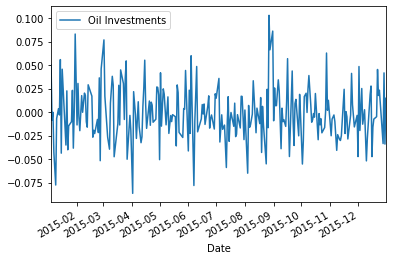

In [37]:
filtered_dates6.plot()

In [38]:
start_date7 = '2016-01-01'
end_date7 = '2016-12-31'

In [39]:
after_start_date = df['Date'] >= start_date7
before_end_date = df['Date'] <= end_date7
between_two_dates = after_start_date & before_end_date
filtered_dates7 = df.loc[between_two_dates]

print(filtered_dates7)

           Date  Oil Investments
1511 2016-04-01        -0.008618
1512 2016-05-01        -0.022820
1513 2016-06-01        -0.055602
1514 2016-07-01        -0.020018
1515 2016-08-01        -0.002704
...         ...              ...
1758 2016-12-23         0.000577
1759 2016-12-27         0.015574
1760 2016-12-28         0.022529
1761 2016-12-29        -0.003888
1762 2016-12-30        -0.000929

[252 rows x 2 columns]


In [40]:
filtered_dates7.set_index('Date',inplace=True)

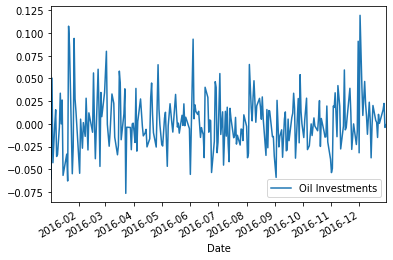

In [41]:
filtered_dates7.plot()

In [42]:
start_date8 = '2017-01-01'
end_date8 = '2017-12-31'

In [43]:
after_start_date = df['Date'] >= start_date8
before_end_date = df['Date'] <= end_date8
between_two_dates = after_start_date & before_end_date
filtered_dates8 = df.loc[between_two_dates]

print(filtered_dates8)

           Date  Oil Investments
1763 2017-03-01        -0.025860
1764 2017-04-01         0.017189
1765 2017-05-01         0.009576
1766 2017-06-01         0.003906
1767 2017-09-01        -0.037607
...         ...              ...
1979 2017-09-11         0.005984
1980 2017-10-11        -0.007173
1981 2017-11-13         0.000352
1982 2017-11-14        -0.019376
1983 2017-11-15        -0.007006

[221 rows x 2 columns]


In [44]:
filtered_dates8.set_index('Date',inplace=True)

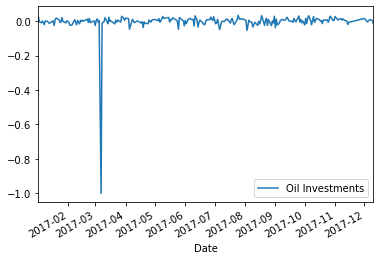

In [45]:
filtered_dates8.plot()

In [46]:
df

,Date,Oil Investments
0,2009-12-31,0.025417
1,2010-04-01,0.026830
2,2010-05-01,0.002699
3,2010-06-01,0.021688
4,2010-07-01,-0.006256
...,...,...
1979,2017-09-11,0.005984
1980,2017-10-11,-0.007173
1981,2017-11-13,0.000352
1982,2017-11-14,-0.019376


In [47]:
df.isnull().sum()

Date               0
Oil Investments    0
dtype: int64

In [48]:
from statsmodels.tsa.stattools import adfuller

In [49]:
test_result=adfuller(df['Oil Investments'])

In [50]:
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-45.94216292983992, 0.0, 0, 1983, {'1%': -3.4336519592295947, '5%': -2.862998620943585, '10%': -2.567546508593341}, -8042.187722182893)


In [51]:
def adfuller_test(investments):
    result=adfuller(investments) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [52]:
adfuller_test(df['Oil Investments'])

ADF Test Statistic : -45.94216292983992
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


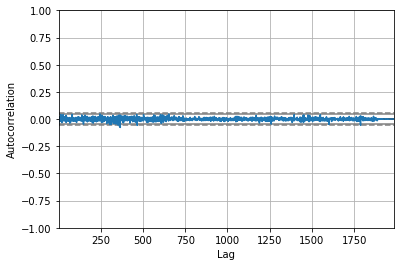

In [53]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Oil Investments'])
plt.show()

In [54]:
from statsmodels.tsa.arima_model import ARIMA

In [55]:
model=ARIMA(filtered_dates8['Oil Investments'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [56]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                  220
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 273.004
Method:                       css-mle   S.D. of innovations              0.069
Date:                Wed, 21 Oct 2020   AIC                           -538.008
Time:                        23:20:26   BIC                           -524.433
Sample:                             1   HQIC                          -532.526
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5.957e-06   7.12e-05      0.084      0.933      -0.000       0.000
ar.L1.D.Oil Investments    -0.0233      0.067     -0.346      0.730      -0.155       0.109
ma.L1.D.Oil Investments    -1.0000      0.016    -63.903      0.000      -1.031      -0.969
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -42.9262           +0.0000j           42.9262            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [57]:
filtered_dates8['forecast']=model_fit.predict(start=1465,end=1983,dynamic=True)
filtered_dates8[['Oil Investments','forecast']].plot(figsize=(15,10))

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: could not broadcast input array from shape (0) into shape (1)

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Oil Investments'],order=(0, 0, 0),seasonal_order=(0,0,0,12)) #(p,d,q,Shift)
results=model.fit()

In [ ]:
df['forecast']=results.predict(start=1750,end=1983,dynamic=True)
df[['Oil Investments','forecast']].plot(figsize=(15,10))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[DateOffset(months=x)for x in range(0,36)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_df=pd.concat([df,future_datest_df])

In [ ]:
future_df['forecast'] = results.predict(start = 1980, end = 2200, dynamic= True)  
future_df[['Oil Investments', 'forecast']].plot(figsize=(12, 8)) 